<a href="https://colab.research.google.com/github/DianaAguilar-A01733009/Actividad1/blob/main/Actividad1_SWI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar librerias y carga del documento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar archivo csv desde el equipo

from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('listings_SWI.csv')
df.head()

In [ ]:
df.dtypes

#Filtrado

In [ ]:
df = df[['host_acceptance_rate', 'review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365', 'review_scores_communication', 'room_type', 'number_of_reviews']]
df

In [ ]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")
df

In [7]:
df['host_acceptance_rate']=df['host_acceptance_rate'].astype({'host_acceptance_rate': 'float64'})
df['price']=df['price'].astype({'price': 'float64'})
df['availability_365']=df['availability_365'].astype({'availability_365': 'float64'})
df['number_of_reviews']=df['number_of_reviews'].astype({'number_of_reviews': 'float64'})

In [ ]:
df['room_type'].unique()

In [ ]:
EntireHome=df[df['room_type']=='Entire home/apt']
EntireHome.head()

In [ ]:
PrivateRoom=df[df['room_type']=='Private room']
PrivateRoom.head()

In [ ]:
SharedRoom=df[df['room_type']=='Shared room']
SharedRoom.head()

#Limpieza de Base de datos

##Entire Home

In [ ]:
#Remplazar datos nulos con promedios
from numpy import nan as NaN
EntireHome=EntireHome.fillna({'host_acceptance_rate':float(EntireHome['host_acceptance_rate'].mean())})
EntireHome=EntireHome.fillna({'review_scores_rating':float(EntireHome['review_scores_rating'].mean())})
EntireHome=EntireHome.fillna({'review_scores_cleanliness':float(EntireHome['review_scores_cleanliness'].mean())})
EntireHome=EntireHome.fillna({'review_scores_communication':float(EntireHome['review_scores_communication'].mean())})

EntireHome

In [ ]:
#Eliminación de outliers
y=EntireHome

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

df3= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

In [ ]:
#Llenar los outliers con el promedio
EntireHome=df3.fillna(round(df3.mean(),1))
EntireHome

In [ ]:
print(len(EntireHome)-EntireHome.count())

##PrivateRoom

In [ ]:
#Remplazar datos nulos con promedios
from numpy import nan as NaN
PrivateRoom=PrivateRoom.fillna({'host_acceptance_rate':float(PrivateRoom['host_acceptance_rate'].mean())})
PrivateRoom=PrivateRoom.fillna({'review_scores_rating':float(PrivateRoom['review_scores_rating'].mean())})
PrivateRoom=PrivateRoom.fillna({'review_scores_cleanliness':float(PrivateRoom['review_scores_cleanliness'].mean())})
PrivateRoom=PrivateRoom.fillna({'review_scores_communication':float(PrivateRoom['review_scores_communication'].mean())})

PrivateRoom

In [ ]:
#Eliminación de outliers
y=PrivateRoom

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

df3= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

In [ ]:
#Llenar los outliers con el promedio
PrivateRoom=df3.fillna(round(df3.mean(),1))
PrivateRoom

In [ ]:
print(len(PrivateRoom)-PrivateRoom.count())

##SharedRoom

In [ ]:
#Remplazar datos nulos con promedios
from numpy import nan as NaN
SharedRoom=SharedRoom.fillna({'host_acceptance_rate':float(SharedRoom['host_acceptance_rate'].mean())})
SharedRoom=SharedRoom.fillna({'review_scores_rating':float(SharedRoom['review_scores_rating'].mean())})
SharedRoom=SharedRoom.fillna({'review_scores_cleanliness':float(SharedRoom['review_scores_cleanliness'].mean())})
SharedRoom=SharedRoom.fillna({'review_scores_communication':float(SharedRoom['review_scores_communication'].mean())})

SharedRoom

In [ ]:
#Eliminación de outliers
y=SharedRoom

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

df3= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

In [ ]:
#Llenar los outliers con el promedio
SharedRoom=df3.fillna(round(df3.mean(),1))
SharedRoom

In [ ]:
print(len(SharedRoom)-SharedRoom.count())

#Análisis de correlaciones por tipo de cuarto

##Entire home/apt

In [24]:
Vars_Dep = EntireHome['number_of_reviews']
Vars_Indep1 = EntireHome[['host_acceptance_rate']]
Vars_Indep2 = EntireHome[['review_scores_rating']]
Vars_Indep3 = EntireHome[['price']]
Vars_Indep4 = EntireHome[['review_scores_cleanliness']]
Vars_Indep5 = EntireHome[['availability_365']]
Vars_Indep6 = EntireHome[['review_scores_communication']]
from sklearn.linear_model import LinearRegression

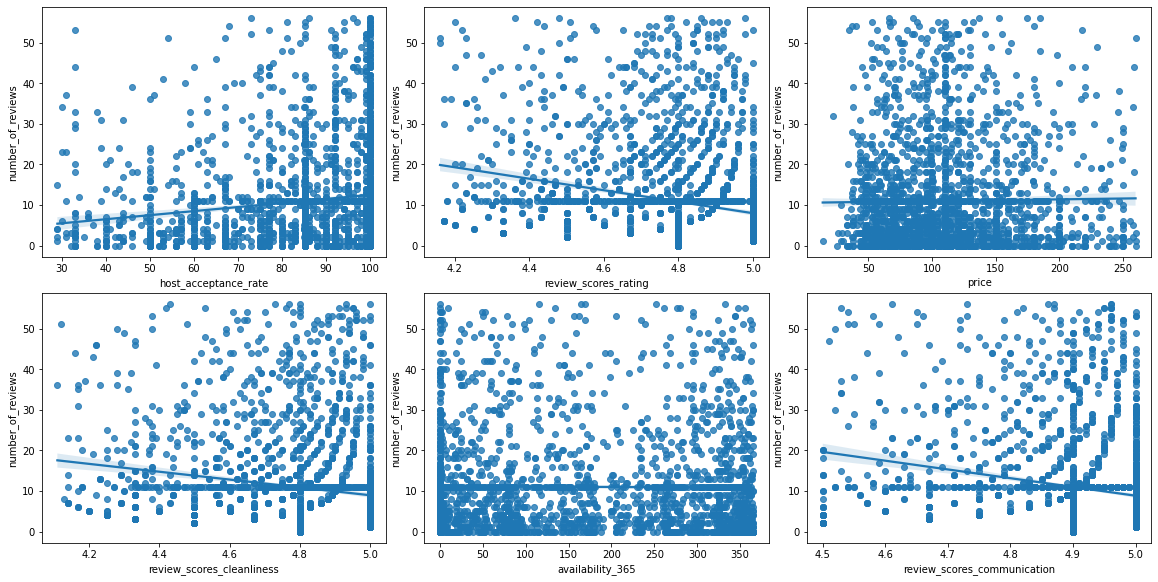

In [25]:
#Gráficas de correlaciones 
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=EntireHome.loc[:,column_sels]#variables explicativas

y=EntireHome['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=EntireHome,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [26]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [27]:
# Correlación de number_of_reviews vs host_acceptance_rate 

model1.fit(X = Vars_Indep1, y = Vars_Dep)
model1.__dict__
model1.score(Vars_Indep1, Vars_Dep)

0.017459295033169675

In [28]:
# Correlación de number_of_reviews vs review_scores_rating 

model2.fit(X = Vars_Indep2, y = Vars_Dep)
model2.__dict__
model2.score(Vars_Indep2, Vars_Dep)

0.04621230983727076

In [29]:
# Correlación de number_of_reviews vs price 

model3.fit(X = Vars_Indep3, y = Vars_Dep)
model3.__dict__
model3.score(Vars_Indep3, Vars_Dep)

0.00023064650634752049

In [30]:
# Correlación de number_of_reviews vs review_scores_cleanliness 

model4.fit(X = Vars_Indep4, y = Vars_Dep)
model4.__dict__
model4.score(Vars_Indep4, Vars_Dep)

0.02225925841143528

In [31]:
# Correlación de number_of_reviews vs availability_365

model5.fit(X = Vars_Indep5, y = Vars_Dep)
model5.__dict__
model5.score(Vars_Indep5, Vars_Dep)

8.392285531189092e-05

In [32]:
# Correlación de number_of_reviews vs review_scores_communication

model6.fit(X = Vars_Indep6, y = Vars_Dep)
model6.__dict__
model6.score(Vars_Indep6, Vars_Dep)

0.037736902030740205

## Private room

In [34]:
Vars_Dep = PrivateRoom['number_of_reviews']
Vars_Indep1 = PrivateRoom[['host_acceptance_rate']]
Vars_Indep2 = PrivateRoom[['review_scores_rating']]
Vars_Indep3 = PrivateRoom[['price']]
Vars_Indep4 = PrivateRoom[['review_scores_cleanliness']]
Vars_Indep5 = PrivateRoom[['availability_365']]
Vars_Indep6 = PrivateRoom[['review_scores_communication']]
from sklearn.linear_model import LinearRegression

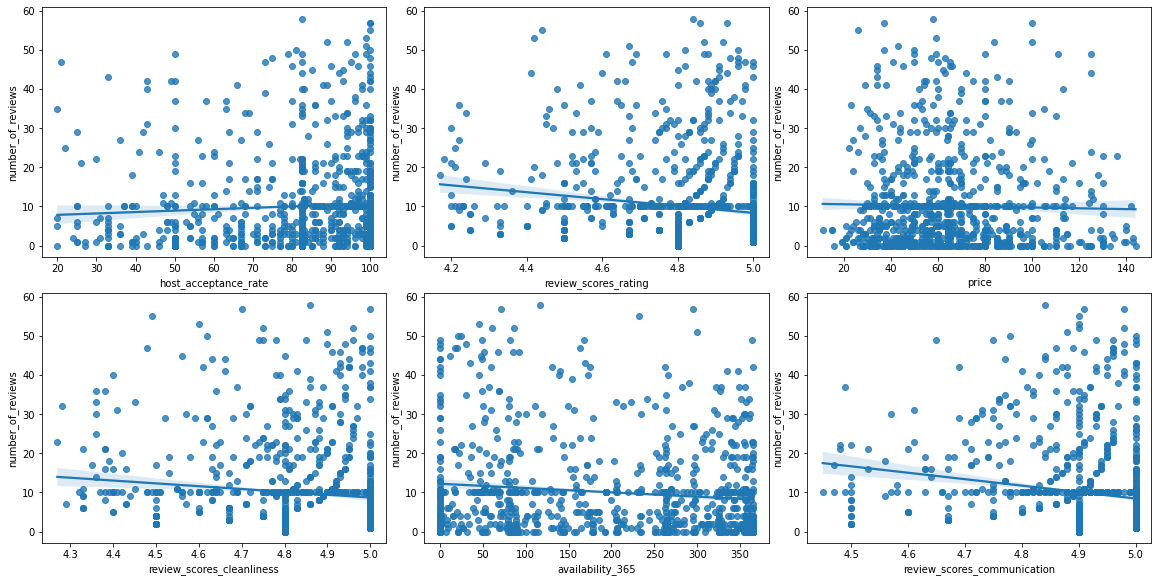

In [35]:
#Gráficas de correlaciones 
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=PrivateRoom.loc[:,column_sels]#variables explicativas

y=PrivateRoom['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=PrivateRoom,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [36]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [37]:
# Correlación de number_of_reviews vs host_acceptance_rate 

model1.fit(X = Vars_Indep1, y = Vars_Dep)
model1.__dict__
model1.score(Vars_Indep1, Vars_Dep)

0.0033161440387409202

In [38]:
# Correlación de number_of_reviews vs review_scores_rating 

model2.fit(X = Vars_Indep2, y = Vars_Dep)
model2.__dict__
model2.score(Vars_Indep2, Vars_Dep)

0.018298283219005618

In [39]:
# Correlación de number_of_reviews vs price 

model3.fit(X = Vars_Indep3, y = Vars_Dep)
model3.__dict__
model3.score(Vars_Indep3, Vars_Dep)

0.0004659969330322866

In [40]:
# Correlación de number_of_reviews vs review_scores_cleanliness 

model4.fit(X = Vars_Indep4, y = Vars_Dep)
model4.__dict__
model4.score(Vars_Indep4, Vars_Dep)

0.009825615777177

In [41]:
# Correlación de number_of_reviews vs availability_365

model5.fit(X = Vars_Indep5, y = Vars_Dep)
model5.__dict__
model5.score(Vars_Indep5, Vars_Dep)

0.015093429305918393

In [42]:
# Correlación de number_of_reviews vs review_scores_communication

model6.fit(X = Vars_Indep6, y = Vars_Dep)
model6.__dict__
model6.score(Vars_Indep6, Vars_Dep)

0.023151881002164587

## Shared room

In [45]:
Vars_Dep = SharedRoom['number_of_reviews']
Vars_Indep1 = SharedRoom[['host_acceptance_rate']]
Vars_Indep2 = SharedRoom[['review_scores_rating']]
Vars_Indep3 = SharedRoom[['price']]
Vars_Indep4 = SharedRoom[['review_scores_cleanliness']]
Vars_Indep5 = SharedRoom[['availability_365']]
Vars_Indep6 = SharedRoom[['review_scores_communication']]
from sklearn.linear_model import LinearRegression

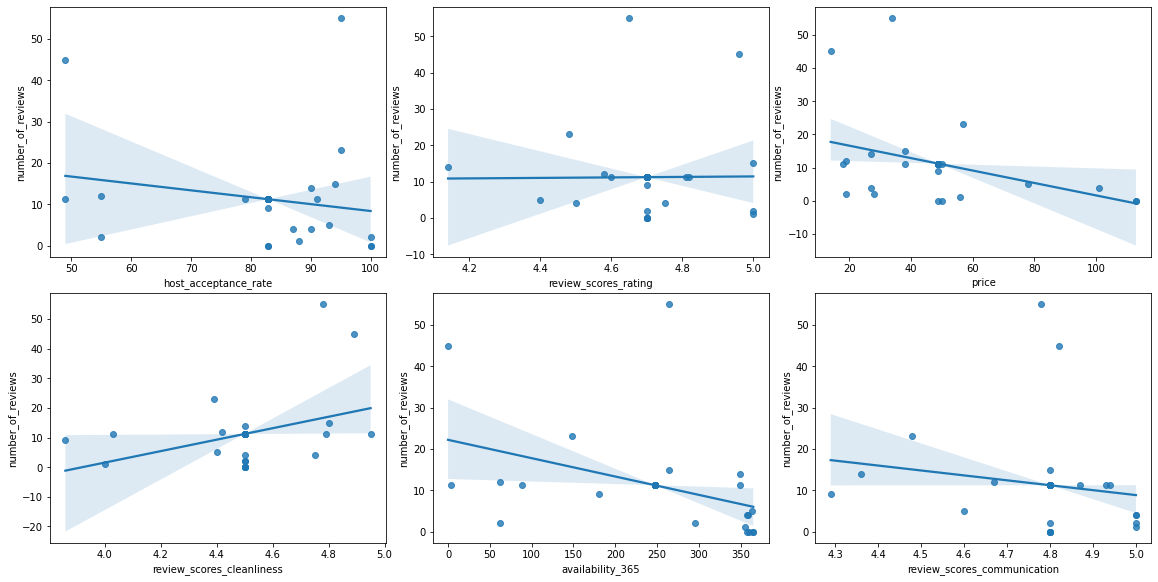

In [46]:
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=SharedRoom.loc[:,column_sels]#variables explicativas

y=SharedRoom['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=SharedRoom,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [47]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [48]:
# Correlación de number_of_reviews vs host_acceptance_rate 

model1.fit(X = Vars_Indep1, y = Vars_Dep)
model1.__dict__
model1.score(Vars_Indep1, Vars_Dep)

0.036672607347529085

In [49]:
# Correlación de number_of_reviews vs review_scores_rating 

model2.fit(X = Vars_Indep2, y = Vars_Dep)
model2.__dict__
model2.score(Vars_Indep2, Vars_Dep)

9.743412821561215e-05

In [50]:
# Correlación de number_of_reviews vs price 

model3.fit(X = Vars_Indep3, y = Vars_Dep)
model3.__dict__
model3.score(Vars_Indep3, Vars_Dep)

0.14961174188266135

In [51]:
# Correlación de number_of_reviews vs review_scores_cleanliness 

model4.fit(X = Vars_Indep4, y = Vars_Dep)
model4.__dict__
model4.score(Vars_Indep4, Vars_Dep)

0.14265082142544916

In [52]:
# Correlación de number_of_reviews vs availability_365

model5.fit(X = Vars_Indep5, y = Vars_Dep)
model5.__dict__
model5.score(Vars_Indep5, Vars_Dep)

0.1685048201181535

In [53]:
# Correlación de number_of_reviews vs review_scores_communication

model6.fit(X = Vars_Indep6, y = Vars_Dep)
model6.__dict__
model6.score(Vars_Indep6, Vars_Dep)

0.027904067194022275

#Creación del modelo predictivo

In [ ]:
from sklearn.linear_model import LinearRegression

##Entire home/apt

In [33]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_EntHom= EntireHome[['review_scores_rating','review_scores_cleanliness']]
Var_Dep_EntHom= EntireHome['number_of_reviews']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelEntHom= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
modelEntHom.fit(X=Vars_Indep_EntHom, y=Var_Dep_EntHom)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelEntHom.__dict__

#Predecimos los valores de total de number_of_reviews a partir de las variables: 'review_scores_rating','review_scores_cleanliness'
y_pred_EntHom= modelEntHom.predict(X=EntireHome[['review_scores_rating','review_scores_cleanliness']])
y_pred_EntHom

#Insertamos la columna de predicciones en el DataFrame
EntireHome.insert(0, 'Predicciones_EntireHome', y_pred_EntHom)
EntireHome

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_EntHom=modelEntHom.score(X=Vars_Indep_EntHom, y=Var_Dep_EntHom)
print("Coeficiente de Determinación: ", coef_Deter_EntHom)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_EntHome=np.sqrt(coef_Deter_EntHom)
print("Coeficiente de Correlación: ", coef_Correl_EntHome)

Coeficiente de Determinación:  0.04691614677506184
Coeficiente de Correlación:  0.21660135450883458


##Private room

In [44]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_PrivRoom= PrivateRoom[['review_scores_rating', 'availability_365', 'review_scores_communication']]
Var_Dep_PrivRoom= PrivateRoom['number_of_reviews']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelPrivRoom= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
modelPrivRoom.fit(X=Vars_Indep_PrivRoom, y=Var_Dep_PrivRoom)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelPrivRoom.__dict__

#Predecimos los valores de total de number_of_reviews a partir de las variables: 'review_scores_rating', 'availability_3650', 'review_scores_communication'
y_pred_PrivRoom= modelPrivRoom.predict(X=PrivateRoom[['review_scores_rating', 'availability_365', 'review_scores_communication']])
y_pred_PrivRoom

#Insertamos la columna de predicciones en el DataFrame
PrivateRoom.insert(0, 'Predicciones_PrivateRoom', y_pred_PrivRoom)
PrivateRoom

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_PrivRoom=modelPrivRoom.score(X=Vars_Indep_PrivRoom, y=Var_Dep_PrivRoom)
print("Coeficiente de Determinación: ", coef_Deter_PrivRoom)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_PrivRoom=np.sqrt(coef_Deter_PrivRoom)
print("Coeficiente de Correlación: ", coef_Correl_PrivRoom)

Coeficiente de Determinación:  0.04279004472491843
Coeficiente de Correlación:  0.2068575469373028


##Shared room

In [54]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_SharedRoom= SharedRoom[['price', 'review_scores_cleanliness', 'availability_365']]
Var_Dep_SharedRoom= SharedRoom['number_of_reviews']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelSharedRoom= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
modelSharedRoom.fit(X=Vars_Indep_SharedRoom, y=Var_Dep_SharedRoom)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelSharedRoom.__dict__

#Predecimos los valores de total de number_of_reviews a partir de las variables: 'price', 'review_scores_cleanliness', 'availability_365'
y_pred_SharedRoom= modelSharedRoom.predict(X=SharedRoom[['price', 'review_scores_cleanliness', 'availability_365']])
y_pred_SharedRoom

#Insertamos la columna de predicciones en el DataFrame
SharedRoom.insert(0, 'Predicciones_SharedRoom', y_pred_SharedRoom)
SharedRoom

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_SharedRoom=modelSharedRoom.score(X=Vars_Indep_SharedRoom, y=Var_Dep_SharedRoom)
print("Coeficiente de Determinación: ", coef_Deter_SharedRoom)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_SharedRoom=np.sqrt(coef_Deter_SharedRoom)
print("Coeficiente de Correlación: ", coef_Correl_SharedRoom)

Coeficiente de Determinación:  0.2632881302787117
Coeficiente de Correlación:  0.5131160982455254


# Tablas de correlación y determinación

##Entire home/apt

In [55]:
#Tabla de correlación

Corr_factoresEntireHome=EntireHome.corr()
Corr_factoresEntireHome

,Predicciones_EntireHome,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_EntireHome,1.000000,0.073027,-0.992471,-0.079887,-0.688802,0.084881,-0.536688,NaN,0.216601
host_acceptance_rate,0.073027,1.000000,-0.081236,-0.016178,0.001535,-0.020611,-0.048468,NaN,0.132134
review_scores_rating,-0.992471,-0.081236,1.000000,0.077637,0.594822,-0.088048,0.527860,NaN,-0.214970
price,-0.079887,-0.016178,0.077637,1.000000,0.064782,0.019127,0.038552,NaN,0.015187
review_scores_cleanliness,-0.688802,0.001535,0.594822,0.064782,1.000000,-0.035940,0.398008,NaN,-0.149195
availability_365,0.084881,-0.020611,-0.088048,0.019127,-0.035940,1.000000,-0.072671,NaN,-0.009161
review_scores_communication,-0.536688,-0.048468,0.527860,0.038552,0.398008,-0.072671,1.000000,NaN,-0.194260
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.216601,0.132134,-0.214970,0.015187,-0.149195,-0.009161,-0.194260,NaN,1.000000


In [56]:
#Tabla de determinación

Det_factoresEntireHome=(EntireHome.corr())**2
Det_factoresEntireHome

,Predicciones_EntireHome,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_EntireHome,1.000000,0.005333,0.984998,0.006382,0.474448,0.007205,0.288034,NaN,0.046916
host_acceptance_rate,0.005333,1.000000,0.006599,0.000262,0.000002,0.000425,0.002349,NaN,0.017459
review_scores_rating,0.984998,0.006599,1.000000,0.006027,0.353813,0.007752,0.278636,NaN,0.046212
price,0.006382,0.000262,0.006027,1.000000,0.004197,0.000366,0.001486,NaN,0.000231
review_scores_cleanliness,0.474448,0.000002,0.353813,0.004197,1.000000,0.001292,0.158411,NaN,0.022259
availability_365,0.007205,0.000425,0.007752,0.000366,0.001292,1.000000,0.005281,NaN,0.000084
review_scores_communication,0.288034,0.002349,0.278636,0.001486,0.158411,0.005281,1.000000,NaN,0.037737
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.046916,0.017459,0.046212,0.000231,0.022259,0.000084,0.037737,NaN,1.000000


## Private room

In [57]:
#Tabla de correlación

Corr_factoresPrivRoom=PrivateRoom.corr()
Corr_factoresPrivRoom

,Predicciones_PrivateRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_PrivateRoom,1.000000,0.088140,-0.653934,-0.032219,-0.403042,-0.593913,-0.735566,NaN,0.206858
host_acceptance_rate,0.088140,1.000000,-0.043562,-0.024675,-0.004043,-0.041801,-0.086383,NaN,0.057586
review_scores_rating,-0.653934,-0.043562,1.000000,0.017231,0.579605,-0.013255,0.530967,NaN,-0.135271
price,-0.032219,-0.024675,0.017231,1.000000,0.064617,0.037403,0.005994,NaN,-0.021587
review_scores_cleanliness,-0.403042,-0.004043,0.579605,0.064617,1.000000,-0.009293,0.354045,NaN,-0.099124
availability_365,-0.593913,-0.041801,-0.013255,0.037403,-0.009293,1.000000,-0.005773,NaN,-0.122855
review_scores_communication,-0.735566,-0.086383,0.530967,0.005994,0.354045,-0.005773,1.000000,NaN,-0.152157
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.206858,0.057586,-0.135271,-0.021587,-0.099124,-0.122855,-0.152157,NaN,1.000000


In [60]:
#Tabla de determinación

Det_factoresPrivRoom=(PrivateRoom.corr())**2
Det_factoresPrivRoom

,Predicciones_PrivateRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_PrivateRoom,1.000000,0.007769,0.427629,0.001038,0.162443,0.352732,0.541058,NaN,0.042790
host_acceptance_rate,0.007769,1.000000,0.001898,0.000609,0.000016,0.001747,0.007462,NaN,0.003316
review_scores_rating,0.427629,0.001898,1.000000,0.000297,0.335942,0.000176,0.281926,NaN,0.018298
price,0.001038,0.000609,0.000297,1.000000,0.004175,0.001399,0.000036,NaN,0.000466
review_scores_cleanliness,0.162443,0.000016,0.335942,0.004175,1.000000,0.000086,0.125348,NaN,0.009826
availability_365,0.352732,0.001747,0.000176,0.001399,0.000086,1.000000,0.000033,NaN,0.015093
review_scores_communication,0.541058,0.007462,0.281926,0.000036,0.125348,0.000033,1.000000,NaN,0.023152
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.042790,0.003316,0.018298,0.000466,0.009826,0.015093,0.023152,NaN,1.000000


##Shared room

In [59]:
#Tabla de correlación

Corr_factoresSharRoom=SharedRoom.corr()
Corr_factoresSharRoom

,Predicciones_SharedRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_SharedRoom,1.000000,-0.642003,0.333232,-0.753819,0.736074,-0.800001,0.178134,NaN,0.513116
host_acceptance_rate,-0.642003,1.000000,-0.317128,0.590454,-0.198566,0.744135,-0.188534,NaN,-0.191501
review_scores_rating,0.333232,-0.317128,1.000000,-0.213914,0.198766,-0.363435,0.603333,NaN,0.009871
price,-0.753819,0.590454,-0.213914,1.000000,-0.238905,0.546856,0.010361,NaN,-0.386797
review_scores_cleanliness,0.736074,-0.198566,0.198766,-0.238905,1.000000,-0.347058,0.363207,NaN,0.377691
availability_365,-0.800001,0.744135,-0.363435,0.546856,-0.347058,1.000000,-0.003974,NaN,-0.410493
review_scores_communication,0.178134,-0.188534,0.603333,0.010361,0.363207,-0.003974,1.000000,NaN,-0.167045
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.513116,-0.191501,0.009871,-0.386797,0.377691,-0.410493,-0.167045,NaN,1.000000


In [58]:
#Tabla de determinación

Det_factoresSharRoom=(SharedRoom.corr())**2
Det_factoresSharRoom

,Predicciones_SharedRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_SharedRoom,1.000000,0.412168,0.111044,0.568243,0.541805,0.640002,0.031732,NaN,0.263288
host_acceptance_rate,0.412168,1.000000,0.100570,0.348636,0.039429,0.553737,0.035545,NaN,0.036673
review_scores_rating,0.111044,0.100570,1.000000,0.045759,0.039508,0.132085,0.364011,NaN,0.000097
price,0.568243,0.348636,0.045759,1.000000,0.057076,0.299051,0.000107,NaN,0.149612
review_scores_cleanliness,0.541805,0.039429,0.039508,0.057076,1.000000,0.120449,0.131920,NaN,0.142651
availability_365,0.640002,0.553737,0.132085,0.299051,0.120449,1.000000,0.000016,NaN,0.168505
review_scores_communication,0.031732,0.035545,0.364011,0.000107,0.131920,0.000016,1.000000,NaN,0.027904
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.263288,0.036673,0.000097,0.149612,0.142651,0.168505,0.027904,NaN,1.000000
